# Gabriella JC-DS-JKT-08 no. 3

Tujuan: prediksi apakah booking hotel dicancel atau tidak oleh customer

## Init

In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

In [79]:
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder

In [39]:
df = pd.read_csv('hotel_bookings.csv')
df = df[:3000]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           3000 non-null   object 
 1   is_canceled                     3000 non-null   int64  
 2   lead_time                       3000 non-null   int64  
 3   arrival_date_year               3000 non-null   int64  
 4   arrival_date_month              3000 non-null   object 
 5   arrival_date_week_number        3000 non-null   int64  
 6   arrival_date_day_of_month       3000 non-null   int64  
 7   stays_in_weekend_nights         3000 non-null   int64  
 8   stays_in_week_nights            3000 non-null   int64  
 9   adults                          3000 non-null   int64  
 10  children                        3000 non-null   float64
 11  babies                          3000 non-null   int64  
 12  meal                            30

In [41]:
df.shape

(3000, 32)

In [42]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [43]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.0,3000.0,3000.000000,2535.000000,123.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.354333,63.740667,2015.0,35.939000,15.072333,1.316000,3.496000,2.033000,0.139000,0.019667,0.0,0.0,0.0,0.210333,209.945562,221.178862,0.345667,105.005467,0.132000,0.728000
std,0.478391,61.241921,0.0,5.616327,9.113952,1.150037,2.394555,1.992796,0.493045,0.141256,0.0,0.0,0.0,0.641532,70.305031,83.433790,4.022716,54.367602,0.340511,0.868102
min,0.000000,0.000000,2015.0,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,2015.0,31.000000,7.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,202.000000,115.500000,0.000000,61.350000,0.000000,0.000000
50%,0.000000,52.000000,2015.0,36.000000,14.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,240.000000,270.000000,0.000000,100.680000,0.000000,0.000000
75%,1.000000,90.000000,2015.0,41.000000,23.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,241.000000,281.000000,0.000000,138.850000,0.000000,1.000000
max,1.000000,737.000000,2015.0,46.000000,31.000000,13.000000,33.000000,55.000000,10.000000,2.000000,0.0,0.0,0.0,17.000000,334.000000,318.000000,50.000000,299.330000,2.000000,4.000000


In [44]:
df.describe(exclude='number')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,3000,3000,3000,2999,3000,3000,3000,3000,3000,3000,3000,3000
unique,1,5,4,53,6,3,8,9,3,4,3,215
top,Resort Hotel,July,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-17
freq,3000,842,2333,1775,1478,2188,1678,1301,2878,2465,1937,68


In [45]:
def summary_table(df):
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes,
                                  null = df.isna().sum(),
                                  null_pct = round(df.isna().sum() / len(df) *100,2),
                                  unique = df.nunique(),
#                                   uniqueSample = [list(df[i].drop_duplicates().sample(2)) for i in df.columns]
                               )
                           ).reset_index(drop=True)
    summary['unique_pct'] = round(summary['unique'] / len(df) *100,2)
    return summary

summary_table(df)

,dataFeatures,dataType,null,null_pct,unique,unique_pct
0,hotel,object,0,0.00,1,0.03
1,is_canceled,int64,0,0.00,2,0.07
2,lead_time,int64,0,0.00,229,7.63
3,arrival_date_year,int64,0,0.00,1,0.03
4,arrival_date_month,object,0,0.00,5,0.17
5,arrival_date_week_number,int64,0,0.00,20,0.67
6,arrival_date_day_of_month,int64,0,0.00,31,1.03
7,stays_in_weekend_nights,int64,0,0.00,10,0.33
8,stays_in_week_nights,int64,0,0.00,18,0.60
9,adults,int64,0,0.00,14,0.47


## Cleaning & Preprocessing

### Null Val

In [46]:
df.isna().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              1
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              465
company                           2877
days_in_waiting_list     

In [47]:
df.isna().sum()[df.isna().sum() > 0]

country       1
agent       465
company    2877
dtype: int64

#### Impute Country with Top Value

In [48]:
df['country'].describe()

count     2999
unique      53
top        PRT
freq      1775
Name: country, dtype: object

In [49]:
df[df['country'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,...,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15


In [50]:
# isi dengan frekuensi terbanyak
# hanya 1 row saja yang kosong

df['country'] = df['country'].fillna(value='PRT')

#### Drop Agent

In [51]:
df.corr()['is_canceled'].abs().sort_values(ascending=False)

is_canceled                       1.000000
required_car_parking_spaces       0.287221
company                           0.210258
lead_time                         0.209572
booking_changes                   0.128840
adr                               0.096483
adults                            0.075522
days_in_waiting_list              0.063667
total_of_special_requests         0.059307
arrival_date_day_of_month         0.051248
stays_in_week_nights              0.045046
children                          0.035686
agent                             0.027248
stays_in_weekend_nights           0.020056
babies                            0.014338
arrival_date_week_number          0.010033
arrival_date_year                      NaN
is_repeated_guest                      NaN
previous_cancellations                 NaN
previous_bookings_not_canceled         NaN
Name: is_canceled, dtype: float64

In [52]:
df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321.])

In [53]:
pd.crosstab(df.distribution_channel, df.agent, margins=True)

agent,2.0,3.0,5.0,6.0,8.0,9.0,15.0,26.0,29.0,36.0,...,304.0,305.0,306.0,314.0,321.0,326.0,328.0,330.0,334.0,All
distribution_channel,,,,,,,,,,,,,,,,,,,,,
Corporate,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,4,3,0,8,80
Direct,1,0,0,0,0,1,0,0,0,0,...,0,20,0,0,0,0,0,0,1,275
TA/TO,12,1,34,21,33,0,27,6,2,10,...,0,0,2,25,1,0,0,3,0,2180
All,13,1,34,21,33,1,27,6,2,10,...,1,20,2,25,1,4,3,3,9,2535


In [54]:
# drop seluruh kolom agent karena korelasi sangat rendah anyway
# informasi menggunakan agent atau tidak sudah ada di kolom distribution_channel
df = df.drop(columns='agent')

#### Drop Company

In [55]:
df.corr()['is_canceled'].abs().sort_values(ascending=False)

is_canceled                       1.000000
required_car_parking_spaces       0.287221
company                           0.210258
lead_time                         0.209572
booking_changes                   0.128840
adr                               0.096483
adults                            0.075522
days_in_waiting_list              0.063667
total_of_special_requests         0.059307
arrival_date_day_of_month         0.051248
stays_in_week_nights              0.045046
children                          0.035686
stays_in_weekend_nights           0.020056
babies                            0.014338
arrival_date_week_number          0.010033
arrival_date_year                      NaN
is_repeated_guest                      NaN
previous_cancellations                 NaN
previous_bookings_not_canceled         NaN
Name: is_canceled, dtype: float64

In [56]:
df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47.])

In [57]:
pd.crosstab(df.distribution_channel, df.company, margins=True)

company,12.0,47.0,53.0,59.0,94.0,110.0,113.0,118.0,144.0,154.0,...,268.0,270.0,274.0,281.0,286.0,307.0,312.0,317.0,318.0,All
distribution_channel,,,,,,,,,,,,,,,,,,,,,
Corporate,1,1,1,1,5,18,2,1,1,4,...,0,3,2,42,1,8,0,0,1,103
Direct,0,0,0,1,0,0,0,0,0,0,...,7,0,0,1,0,0,2,4,0,17
TA/TO,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
All,1,1,1,2,5,18,3,1,1,4,...,7,3,2,43,1,8,2,4,1,123


In [58]:
# drop seluruh kolom agent karena korelasi masih tergolong rendah ~ 0.2
# kolom company adalah penjelas label 'corporate' distribution_channel
df = df.drop(columns='company')

#### Result

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           3000 non-null   object 
 1   is_canceled                     3000 non-null   int64  
 2   lead_time                       3000 non-null   int64  
 3   arrival_date_year               3000 non-null   int64  
 4   arrival_date_month              3000 non-null   object 
 5   arrival_date_week_number        3000 non-null   int64  
 6   arrival_date_day_of_month       3000 non-null   int64  
 7   stays_in_weekend_nights         3000 non-null   int64  
 8   stays_in_week_nights            3000 non-null   int64  
 9   adults                          3000 non-null   int64  
 10  children                        3000 non-null   float64
 11  babies                          3000 non-null   int64  
 12  meal                            30

### Unnecessary Cols

In [60]:
df.groupby('is_canceled').agg('mean')

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,,,,,,,,,,,,,,,,,
0,54.234383,2015.0,35.897264,14.726381,1.298916,3.416107,1.921528,0.125968,0.021167,0.0,0.0,0.0,0.271554,0.535364,101.120222,0.20444,0.766133
1,81.063029,2015.0,36.015052,15.702728,1.347131,3.641580,2.236124,0.162747,0.016933,0.0,0.0,0.0,0.098777,0.000000,112.085165,0.00000,0.658514


In [61]:
pd.crosstab(df.is_canceled, df.reservation_status, margins=True)

reservation_status,Canceled,Check-Out,No-Show,All
is_canceled,,,,
0,0,1937,0,1937
1,1037,0,26,1063
All,1037,1937,26,3000


In [62]:
summ = summary_table(df)
summ[summ['unique']<2]

# tidak berguna karena semua row bervalue sama

,dataFeatures,dataType,null,null_pct,unique,unique_pct
0,hotel,object,0,0.0,1,0.03
3,arrival_date_year,int64,0,0.0,1,0.03
16,is_repeated_guest,int64,0,0.0,1,0.03
17,previous_cancellations,int64,0,0.0,1,0.03
18,previous_bookings_not_canceled,int64,0,0.0,1,0.03


In [63]:
# drop kolom2 yang menurut logika & intuisi kurang berguna bagi model

df = df.drop(columns=[
    'hotel', 
#     'is_canceled', ---->TARGET
#     'lead_time', 
    'arrival_date_year',
#     'arrival_date_month', ----> CUKUP MEWAKILKAN SEASONALITY
    'arrival_date_week_number',
    'arrival_date_day_of_month', 
#     'stays_in_weekend_nights',
#     'stays_in_week_nights', 
#     'adults', 
#     'children', 
#     'babies', 
#     'meal', 
    'country',
#     'market_segment', 
#     'distribution_channel', 
    'is_repeated_guest',
    'previous_cancellations', 
    'previous_bookings_not_canceled',
#     'reserved_room_type', 
#     'assigned_room_type', 
#     'booking_changes',
#     'deposit_type', 
#     'days_in_waiting_list', 
#     'customer_type', 
#     'adr',
#     'required_car_parking_spaces', 
#     'total_of_special_requests',
    'reservation_status',  # ----> SUDAH DIWAKILKAN TARGET
    'reservation_status_date'  # ---->  related with above
])

### Feature Engineering

In [64]:
df.columns

Index(['is_canceled', 'lead_time', 'arrival_date_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [65]:
df['length_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['number_guest'] = df['adults'] + df['children'] + df['babies']

In [66]:
df.corr()['is_canceled'].abs().sort_values(ascending=False)

# engineered feats cukup bagus

is_canceled                    1.000000
required_car_parking_spaces    0.287221
lead_time                      0.209572
booking_changes                0.128840
adr                            0.096483
number_guest                   0.080825
adults                         0.075522
days_in_waiting_list           0.063667
total_of_special_requests      0.059307
stays_in_week_nights           0.045046
length_stay                    0.039187
children                       0.035686
stays_in_weekend_nights        0.020056
babies                         0.014338
Name: is_canceled, dtype: float64

In [67]:
# keep length_stay + number_guest

df = df.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies'])

In [68]:
df.describe(exclude='number')

,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
count,3000,3000,3000,3000,3000,3000,3000,3000
unique,5,4,6,3,8,9,3,4
top,July,BB,Online TA,TA/TO,A,A,No Deposit,Transient
freq,842,2333,1478,2188,1678,1301,2878,2465


In [83]:
df['change_room_type'] = df['reserved_room_type'] != df['assigned_room_type']

In [84]:
df['change_room_type'].value_counts()

False    2465
True      535
Name: change_room_type, dtype: int64

In [85]:
label_encoder = LabelEncoder()
df['change_room_type'] = label_encoder.fit_transform(df['change_room_type'])
print({index: label for index, label in enumerate(label_encoder.classes_)})
print(f'Successfully encoded')

{0: False, 1: True}
Successfully encoded


In [86]:
df.corr()['is_canceled'].abs().sort_values(ascending=False)

# engineered feat cukup bagus

is_canceled                    1.000000
change_room_type               0.288683
required_car_parking_spaces    0.287221
lead_time                      0.209572
booking_changes                0.128840
adr                            0.096483
number_guest                   0.080825
days_in_waiting_list           0.063667
total_of_special_requests      0.059307
length_stay                    0.039187
Name: is_canceled, dtype: float64

## EDA

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_canceled                  3000 non-null   int64  
 1   lead_time                    3000 non-null   int64  
 2   arrival_date_month           3000 non-null   object 
 3   meal                         3000 non-null   object 
 4   market_segment               3000 non-null   object 
 5   distribution_channel         3000 non-null   object 
 6   reserved_room_type           3000 non-null   object 
 7   assigned_room_type           3000 non-null   object 
 8   booking_changes              3000 non-null   int64  
 9   deposit_type                 3000 non-null   object 
 10  days_in_waiting_list         3000 non-null   int64  
 11  customer_type                3000 non-null   object 
 12  adr                          3000 non-null   float64
 13  required_car_parki

In [88]:
df.columns

Index(['is_canceled', 'lead_time', 'arrival_date_month', 'meal',
       'market_segment', 'distribution_channel', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'length_stay', 'number_guest', 'change_room_type'],
      dtype='object')

In [95]:
target = 'is_canceled'
num_feats = [
    'lead_time', 'booking_changes', 'days_in_waiting_list', 'adr',
    'required_car_parking_spaces', 'total_of_special_requests', 'length_stay',
    'number_guest'
]
cat_feats = [
    'arrival_date_month', 'meal', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type', 'deposit_type',
    'customer_type', 'change_room_type'
]
1 + len(num_feats) + len(cat_feats) == len(df.columns)

True

### Distributions

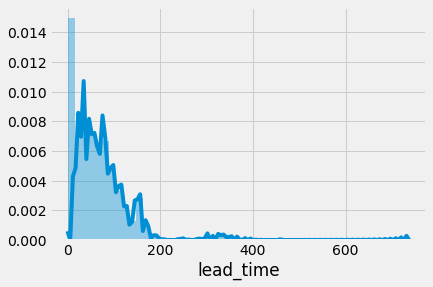

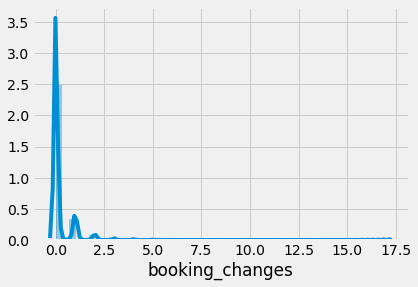

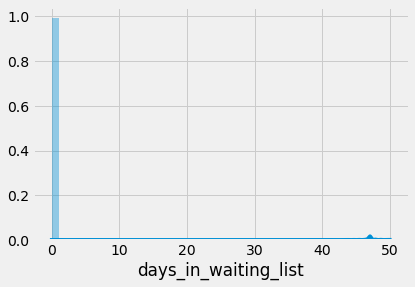

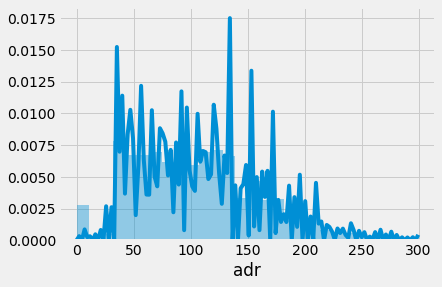

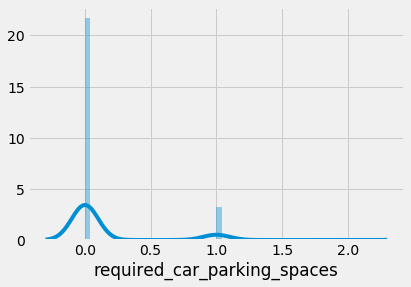

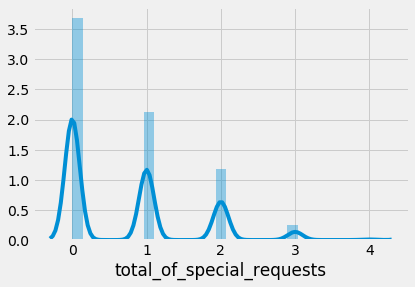

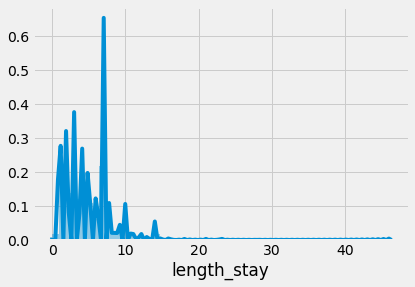

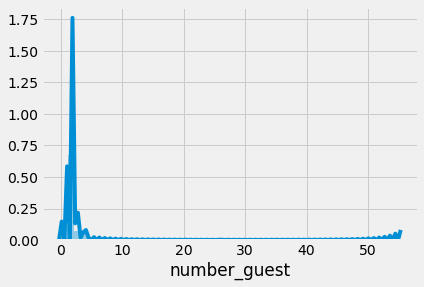

In [96]:
for column in num_feats:
    sns.distplot(df[column], kde_kws={'bw':0.1})
    plt.show()

In [97]:
def normal_shapiro(df, col, alpha):
    '''Function to identify outliers in a column based on interquantile range (IQR)
       df = Dataset name
       col = Column name
       alpha = Threshold level (float)'''
    
    stat, p = shapiro(df[col])
    print(col)
    print(' Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print(' Distribution looks Gaussian (fail to reject H0)')
    else:
        print(' Distribution does not look Gaussian (reject H0)')
    print('\n')
    
for feat in num_feats:
    normal_shapiro(df, feat, 0.05)
    
# semua tidak normal maka untuk spot outliers gunakan IQR

lead_time
 Statistics=0.816, p=0.000
 Distribution does not look Gaussian (reject H0)


booking_changes
 Statistics=0.350, p=0.000
 Distribution does not look Gaussian (reject H0)


days_in_waiting_list
 Statistics=0.057, p=0.000
 Distribution does not look Gaussian (reject H0)


adr
 Statistics=0.979, p=0.000
 Distribution does not look Gaussian (reject H0)


required_car_parking_spaces
 Statistics=0.400, p=0.000
 Distribution does not look Gaussian (reject H0)


total_of_special_requests
 Statistics=0.775, p=0.000
 Distribution does not look Gaussian (reject H0)


length_stay
 Statistics=0.881, p=0.000
 Distribution does not look Gaussian (reject H0)


number_guest
 Statistics=0.185, p=0.000
 Distribution does not look Gaussian (reject H0)




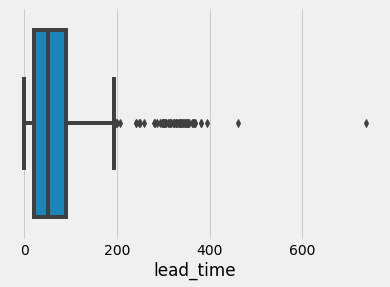

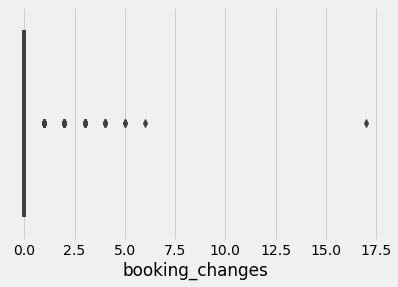

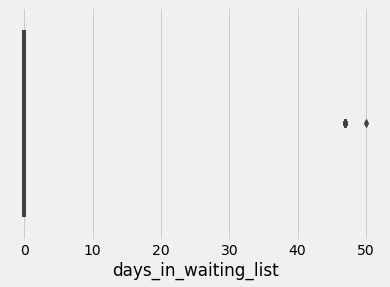

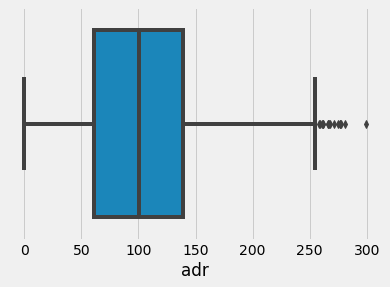

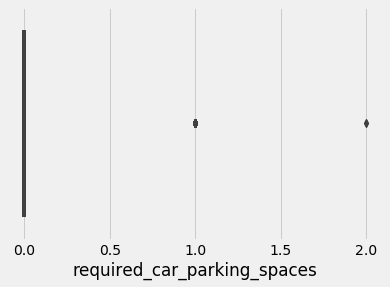

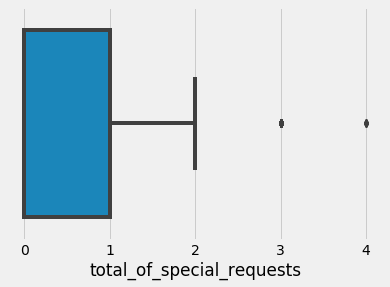

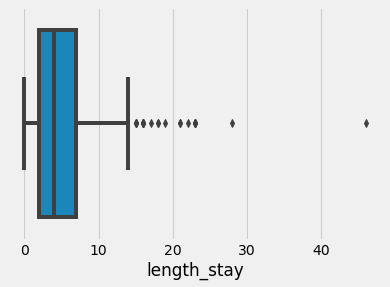

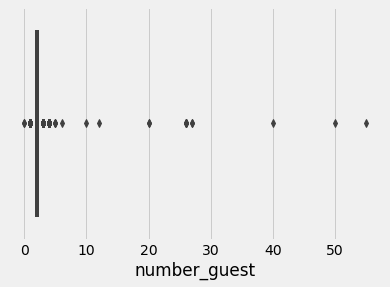

In [98]:
for feat in num_feats:
    sns.boxplot(df[feat])
    plt.show()
    
# visually spotted outliers

In [99]:
def out_iqr(df, col):
    '''Function to identify outliers in a column based on interquantile range (IQR)
       df = Dataset name
       col = Column name'''
    
    q1 = df[col].describe()['25%']
    q3 = df[col].describe()['75%']
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    
    n_out = df[(df[col]<=lower)|(df[col]>=upper)].shape[0]
    n_pct = round(n_out/len(df[col])*100, 2)
    
    return 'Identified outlier in {}: \n {} records, \n {} percent, \n lower threshold: {} \n upper threshold: {} \n'.format(
        col, n_out, n_pct, round(lower, 3), round(upper, 3))

for column in num_feats:
    print(out_iqr(df, column))

Identified outlier in lead_time: 
 68 records, 
 2.27 percent, 
 lower threshold: -85.0 
 upper threshold: 195.0 

Identified outlier in booking_changes: 
 3000 records, 
 100.0 percent, 
 lower threshold: 0.0 
 upper threshold: 0.0 

Identified outlier in days_in_waiting_list: 
 3000 records, 
 100.0 percent, 
 lower threshold: 0.0 
 upper threshold: 0.0 

Identified outlier in adr: 
 16 records, 
 0.53 percent, 
 lower threshold: -54.9 
 upper threshold: 255.1 

Identified outlier in required_car_parking_spaces: 
 3000 records, 
 100.0 percent, 
 lower threshold: 0.0 
 upper threshold: 0.0 

Identified outlier in total_of_special_requests: 
 109 records, 
 3.63 percent, 
 lower threshold: -1.5 
 upper threshold: 2.5 

Identified outlier in length_stay: 
 25 records, 
 0.83 percent, 
 lower threshold: -5.5 
 upper threshold: 14.5 

Identified outlier in number_guest: 
 3000 records, 
 100.0 percent, 
 lower threshold: 2.0 
 upper threshold: 2.0 



In [101]:
# outlier 100% diakibatkan salah satu label mendominasi sehingga Q1=Q2=Q3 tapi sbnrnya OK
# untuk yg lainnya outlier kecil < 5%

In [102]:
df.describe()

# no negative values: check
# max values mungkin terjadi: check

# let's keep outliers

,is_canceled,lead_time,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,length_stay,number_guest,change_room_type
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.354333,63.740667,0.210333,0.345667,105.005467,0.132000,0.728000,4.812000,2.191667,0.178333
std,0.478391,61.241921,0.641532,4.022716,54.367602,0.340511,0.868102,3.341114,2.054671,0.382857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,61.350000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,0.000000,52.000000,0.000000,0.000000,100.680000,0.000000,0.000000,4.000000,2.000000,0.000000
75%,1.000000,90.000000,0.000000,0.000000,138.850000,0.000000,1.000000,7.000000,2.000000,0.000000
max,1.000000,737.000000,17.000000,50.000000,299.330000,2.000000,4.000000,46.000000,55.000000,1.000000


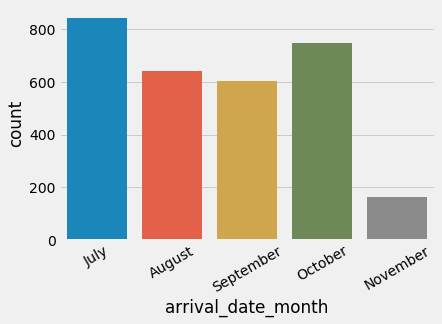

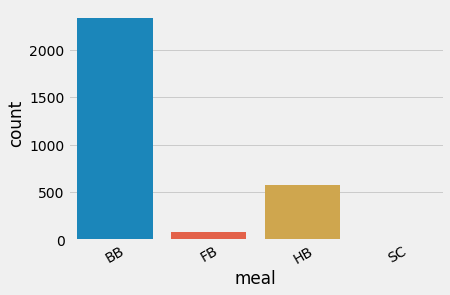

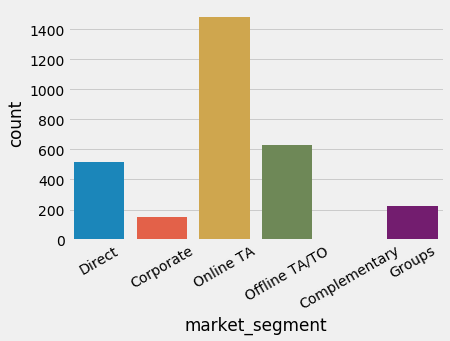

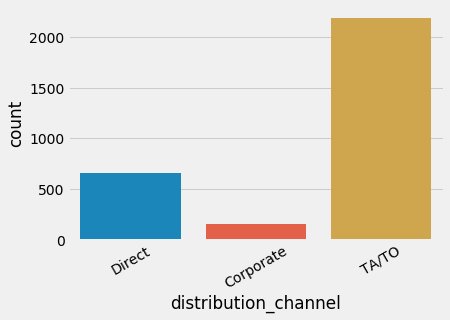

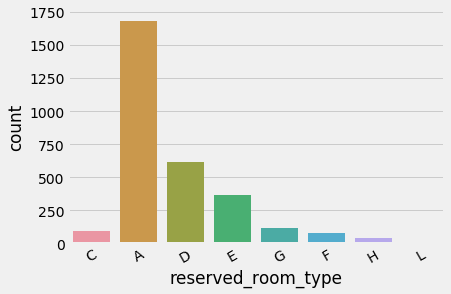

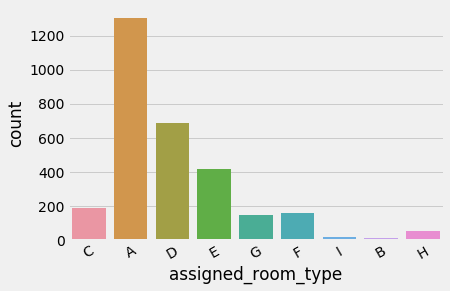

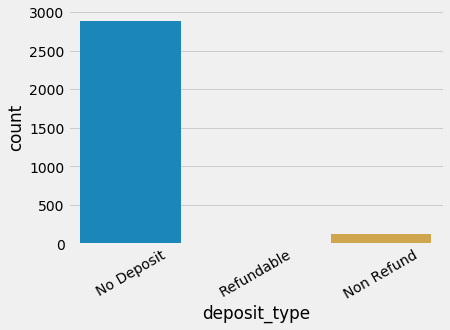

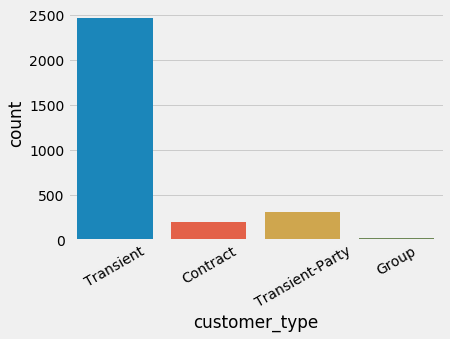

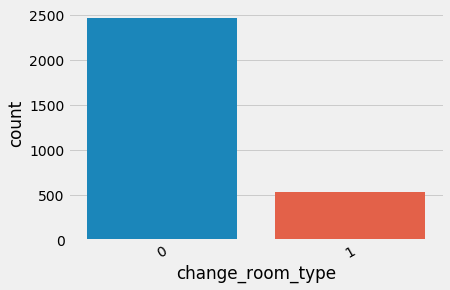

In [109]:
for feat in cat_feats:
    sns.countplot(df[feat])
    plt.xticks(rotation=30)
    plt.show()

In [118]:
df[cat_feats].describe(exclude='number').iloc[2]

# terpopuler

arrival_date_month            July
meal                            BB
market_segment           Online TA
distribution_channel         TA/TO
reserved_room_type               A
assigned_room_type               A
deposit_type            No Deposit
customer_type            Transient
Name: top, dtype: object

Insights:
* Hotel paling ramai pada bulan Juli (tengah musim panas). Disarankan untuk mengecek apakah jumlah personel, perlengkapan (sourcing), makanan sudah dipersiapkan sehingga cukup untuk melayani guest.
* Guest hampir tidak pernah memesan paket makanan selain breakfast, yang biasanya sudah included dengan fare package room (gratis dengan room). Jikapun memesan tambahan, biasanya hanya menambahkan dinner.
* Guest menyukai booking hotel dengan travel agent, melalui online. Mungkin ini cara yang paling praktis menurut guest.

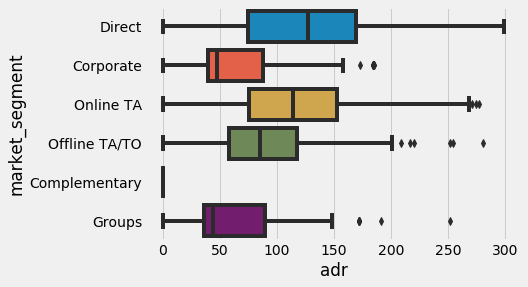

In [124]:
sns.boxplot(data = df,
            x = 'adr',
            y = 'market_segment',
           )

Booking secara group & corporate (jumlah guest atau booking banyak) paling ekonomis bagi guest.

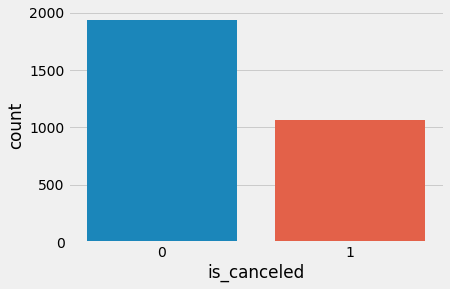

In [110]:
sns.countplot(df[target])

# 1 = cancel

In [111]:
def composition(col):
    return df[col].value_counts().apply(lambda x: str(round(x/df[col].value_counts().sum()*100, 2))+'%')

composition(target)

# rasio cukup ok, tidak imbalance

0    64.57%
1    35.43%
Name: is_canceled, dtype: object

## Export

In [122]:
df.to_csv('hotel_bookings_clean.csv', index=False)